## Analyzing and Visualizing Twitch Data

[Twitch](https://www.twitch.tv/) is the world’s leading video platform and community where millions of people and thousands of interests collide in a beautiful explosion of video games, pop culture, and conversation. Its live and on-demand video platform forms the backbone of a distribution network for video game broadcasters including professional players, tournaments, leagues, developers and gaming media organizations.

In this project, we have partnered with Twitch’s Science Team and will be working with a table that describe user engagement with Twitch video and chat. The project is broken down into two parts:

__Part 1:__ Analyze Gaming Data with SQL

__Part 2:__ Visualize Gaming Data with Matplotlib

Note: The data is scrubbed and is meant for practice use only.

## Part1: Analyzing Gaming Data with SQL

__Let's first import the necessary libraries, including sqlite3__

In [2]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

__Let's make the connection of the table to our notebook.__

In [5]:
# Instantiate a connection
connection = sqlite3.connect("stream.db")
 
# Instantiate a cursor
cursor = connection.cursor()
 
# Create a table
#stream.to_sql("stream", connection)

__1. Let's start by getting a feel for the stream table by selecting the first 20 rows.__

In [6]:
pd.read_sql_query('''SELECT * FROM stream LIMIT 20;''', connection)

,index,time,device_id,login,channel,country,player,game
0,0,2015-01-01 18:45,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,1,2015-01-01 1:16,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2,2015-01-01 16:22,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,3,2015-01-01 3:58,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,4,2015-01-01 11:47,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,None,Dota 2
5,5,2015-01-01 17:59,6fcc75522de37833a0fb21fba4965aad3b63ea57,f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0,jerry,RU,None,Dota 2
6,6,2015-01-01 2:24,dea94b3030025d837dd841fbfd479e775987f65d,9dbbcf6c7792074771c4c7284807041eac467ad5,elaine,TW,None,Gaming Talk Shows
7,7,2015-01-01 18:26,671bee0f3d66077876d9bc231990597292392cc2,51c286a41daa8e060275f622f2b8436bee9fab91,jerry,UA,None,Dota 2
8,8,2015-01-01 13:13,8b31d5ebd1f4f41d4365ae4a471c1686dd256745,06decad1d9565150791e183da017f47123433a4c,estelle,GB,ipad_t,Dota 2
9,9,2015-01-01 20:20,f2ebb129e6930e608f2ed3f5fb52bc4d533c4891,4679f8113aa157ba76fc6db5878d7ee625e88d55,frank,CA,None,League of Legends


stream has the following columns:

time, device_id, login, channel, country, player, game

__2. Let's write a quesry to see the unique games from the stream table.__

In [6]:
pd.read_sql_query('''SELECT DISTINCT game FROM stream;''', connection)

,game
0,Dota 2
1,Devil May Cry 4: Special Edition
2,League of Legends
3,Gaming Talk Shows
4,DayZ
5,The Binding of Isaac: Rebirth
6,World of Tanks
7,Counter-Strike: Global Offensive
8,Heroes of the Storm
9,Agar.io


So we have around 15 distinct games.

__3. Now let's see the distinct channels.__

In [7]:
pd.read_sql_query('''SELECT DISTINCT channel
FROM stream;''', connection)


,channel
0,jerry
1,elaine
2,frank
3,estelle
4,george
5,newman
6,susan
7,kramer
8,morty
9,helen


And we have 10 unique channels.

__4. What are the most popular games in the stream table?__

__Let's create a list of games and their number of viewers using GROUP BY.__

In [8]:
pd.read_sql_query('''
SELECT game, COUNT(*)
FROM stream
GROUP BY game
ORDER BY COUNT(*) DESC;''', connection)

,game,COUNT(*)
0,League of Legends,53
1,Dota 2,31
2,DayZ,14
3,Heroes of the Storm,13
4,Counter-Strike: Global Offensive,13
5,Gaming Talk Shows,11
6,World of Tanks,7
7,Hearthstone: Heroes of Warcraft,6
8,The Binding of Isaac: Rebirth,2
9,Devil May Cry 4: Special Edition,2


__5. The most popular game comes out to be League of Legends (also known as LoL).__

__Where are these LoL stream viewers located? Let's create a list of countries and their number of LoL viewers using WHERE and GROUP BY.__

In [9]:
pd.read_sql_query('''

SELECT country, COUNT(*)
FROM stream
WHERE game = 'League of Legends'
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;''', connection)

,country,COUNT(*)
0,US,30
1,GB,4
2,NO,2
3,NL,2
4,DE,2
5,CA,2
6,ZA,1
7,SE,1
8,RS,1
9,PT,1


The game is played internationally with maximum number of players in the US.

__6. The player column contains the source the user is using to view the stream (site, iphone, android, etc).__

__Let's create a list of players and their number of streamers.__

In [10]:
pd.read_sql_query('''
SELECT player, COUNT(*)
FROM stream
GROUP BY player
ORDER BY COUNT(*) DESC;''', connection)

,player,COUNT(*)
0,None,121
1,android,18
2,iphone_t,13
3,ipad_t,6


__7. Let's create a new column named genre for each of the games.__

Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other.

Using CASE, our logic should be:

If League of Legends → MOBA
If Dota 2 → MOBA
If Heroes of the Storm → MOBA
If Counter-Strike: Global Offensive → FPS
If DayZ → Survival
If ARK: Survival Evolved → Survival
Else → Other
We will use GROUP BY and ORDER BY to showcase only the unique game titles

In [11]:
pd.read_sql_query('''SELECT game,
 CASE 
  WHEN game = 'Dota 2'
     THEN 'MOBA'
  WHEN game = 'League of Legends'
     THEN 'MOBA'
  WHEN game = 'Heroes of the Storm'
      THEN 'MOBA'
    WHEN game = 'Counter-Strike: Global Offensive'
      THEN 'FPS'
    WHEN game = 'DayZ'
      THEN 'Survival'
    WHEN game = 'ARK: Survival Evolved'
      THEN 'Survival'
  ELSE 'Other'
  END AS 'genre',
  COUNT(*)
FROM stream
GROUP BY 1
ORDER BY 3 DESC;
''', connection)

,game,genre,COUNT(*)
0,League of Legends,MOBA,53
1,Dota 2,MOBA,31
2,DayZ,Survival,14
3,Heroes of the Storm,MOBA,13
4,Counter-Strike: Global Offensive,FPS,13
5,Gaming Talk Shows,Other,11
6,World of Tanks,Other,7
7,Hearthstone: Heroes of Warcraft,Other,6
8,The Binding of Isaac: Rebirth,Other,2
9,Devil May Cry 4: Special Edition,Other,2


__8. How does view count change in the course of a day?__

Before we get started, let’s run a query and take a look at the time column from the stream table.

In [12]:
pd.read_sql_query('''
SELECT time
FROM stream
LIMIT 10;''', connection)

,time
0,2015-01-01 18:45
1,2015-01-01 1:16
2,2015-01-01 16:22
3,2015-01-01 3:58
4,2015-01-01 11:47
5,2015-01-01 17:59
6,2015-01-01 2:24
7,2015-01-01 18:26
8,2015-01-01 13:13
9,2015-01-01 20:20


The data type of the time column is DATETIME. It is for storing a date/time value in the database.

Notice that the values are formatted like:

2015-01-01 18:33:52

So the format is:

YYYY-MM-DD HH:MM:SS

SQLite comes with a strftime() function - a very powerful function that allows you to return a formatted date.

It takes two arguments:

strftime(format, column)

Let's test a function that returns the seconds, SS, of the timestamp column.

In [13]:
pd.read_sql_query('''
SELECT time,
   strftime('%S', time)
FROM stream
GROUP BY 1
LIMIT 20;''', connection)

,time,"strftime('%S', time)"
0,2015-01-01 10:07,00
1,2015-01-01 10:56,00
2,2015-01-01 11:04,00
3,2015-01-01 11:05,00
4,2015-01-01 11:06,00
5,2015-01-01 11:23,00
6,2015-01-01 11:25,00
7,2015-01-01 11:32,00
8,2015-01-01 11:33,00
9,2015-01-01 11:43,00


Now we understand how strftime() works. Let’s write a query that returns two columns:

The hours of the time column

The view count for each hour

Lastly, filter the result with only the users in a specific country(because this data is international and there are multiple time differences) using a WHERE clause.

In [14]:
pd.read_sql_query('''
SELECT strftime('%H', time),
   COUNT(*)
FROM stream
WHERE country = 'US'
GROUP BY 1;''', connection)

,"strftime('%H', time)",COUNT(*)
0,None,9
1,10,1
2,11,2
3,12,4
4,13,4
5,15,2
6,16,5
7,17,8
8,18,5
9,19,7


## Part 2: Visualizing Gaming Data with Matplotlib

Now that we’ve conducted some analysis with SQL, we will be taking our findings from the SQL queries and visualize them using Python and Matplotlib, in the forms of:

Bar Graph: Featured Games

Pie Chart: Stream Viewers’ Locations

Line Graph: Time Series Analysis

The Twitch Science Team provided this practice dataset. The dataset(.csv files (800,000 rows)) can be downloaded from [GitHub](https://github.com/sonnynomnom/Codecademy-Learn-SQL-from-Scratch/tree/master/Twitch).

Note: This is data is scrubbed and is meant for practice use only.

### Bar Graph: Featured Games

In [18]:

games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

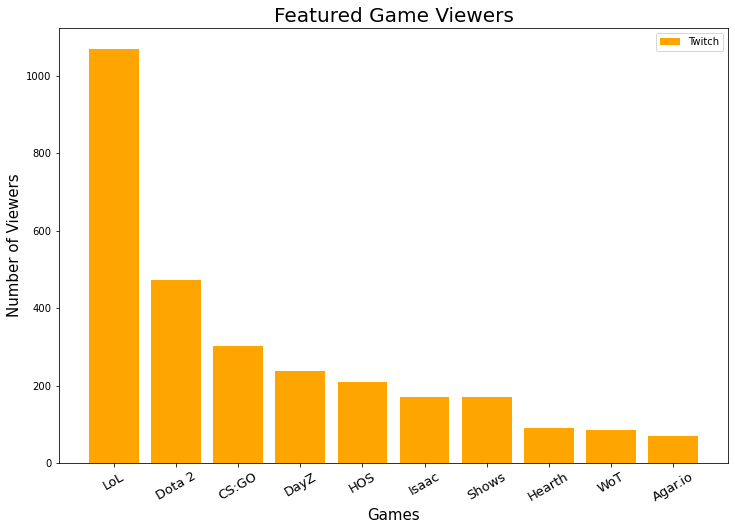

In [24]:
plt.figure(figsize=(12,8))
plt.bar(range(len(games)), viewers, color='orange')
plt.title('Featured Game Viewers', fontsize=20)
plt.xlabel('Games', fontsize=15)
plt.ylabel('Number of Viewers', fontsize=15)
plt.legend(['Twitch'])
ax=plt.subplot()
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation=30, fontsize=13)
plt.show()
plt.close('all')


### Pie Chart: League of Legends Viewers' Whereabouts

In [10]:

labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]

countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

# These country abbriviations are:

# US - United States Hello World
# DE - Germany Hallo Welt
# CA - Canada Hi
# ∅ - N/A
# GB - Great Britain Rubbish
# TR - Turkey Selam Dünya
# BR - Brazil Olá Mundo
# DK - Denmark Hej Verden
# PL - Poland Witaj świecie
# BE - Belgium Hallo Wereld
# NL - Netherlands Hello wereld opnieuw!
# Others

In [26]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

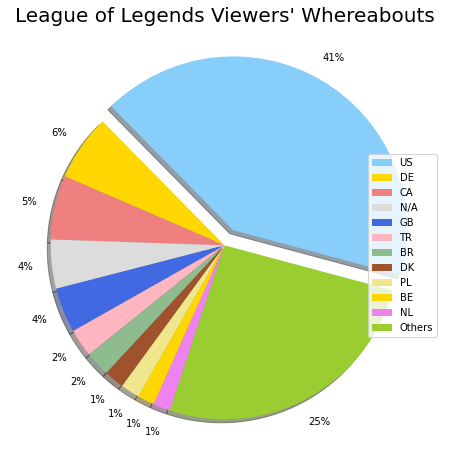

In [27]:
plt.figure(figsize=(12,8))
plt.pie(countries, colors = colors, explode= explode, shadow=True, startangle=345, autopct='%d%%',pctdistance=1.15)
plt.title("League of Legends Viewers' Whereabouts", fontsize=20)
plt.legend(labels, loc='right')
plt.show()

plt.close('all')

###  Line Graph: Time Series Analysis

In [28]:

hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

In [9]:
# There is some uncertainty in these numbers because some people leave their browsers open. Let’s account for a 15% error in the viewers_hour data.
# First, create a list containing the upper bound of the viewers_hour and call it y_upper.
# Then, create a list containing the lower bound of the viewers_hour and call it y_lower.
# Lastly, use plt.fill_between() to shade the error, with an alpha of 0.2.

y_upper = [i + 0.15* i  for i in viewers_hour]
y_lower = [i - i * 0.15 for i in viewers_hour]

NameError: name 'viewers_hour' is not defined

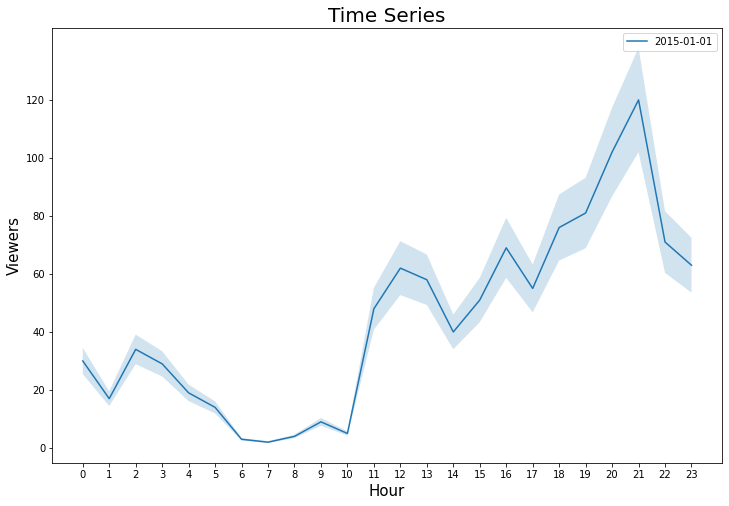

In [32]:
plt.figure(figsize=(12,8))
plt.plot(hour, viewers_hour)
plt.title('Time Series', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Viewers', fontsize=15)
plt.legend(['2015-01-01'])
ax=plt.subplot()
ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])
plt.fill_between(hour, y_lower, y_upper, alpha=0.2)
plt.show()

### Conclusion:
- From the bar graph, we conclude that the most trending game is League of Legends(LOL), followed by DOTA 2 and CS:GO whereas Agar.io is played the least.
- From the pie chart, which shows the percentage of viewers of LOL in the world, we see that this game is played internationally with the maximum proportion (41%) of viewers in the US.
- From the line graph, we see a peak at 9 p.m.. So, the viewers are active at 9 p.m. the most and the least at around 7 a.m.